In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [40]:
spotify_data_path = '6.3.3_spotify_5000_songs.csv'
data = pd.read_csv(spotify_data_path)
data.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [41]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]


In [42]:
data.columns = data.columns.str.strip()  
missing_features = [feature for feature in features if feature not in data.columns]
if missing_features:
    print(f"Missing features in the dataset: {missing_features}")
else:
    print(data[features].describe())

       danceability       energy     loudness  speechiness  acousticness  \
count   5235.000000  5235.000000  5235.000000  5235.000000   5235.000000   
mean       0.509503     0.653565    -9.338098     0.083178      0.290043   
std        0.218041     0.288335     6.294850     0.071193      0.355985   
min        0.000000     0.000000   -60.000000     0.000000      0.000000   
25%        0.309000     0.479000   -11.337000     0.039000      0.002450   
50%        0.539000     0.738000    -7.338000     0.055800      0.095400   
75%        0.688000     0.893000    -5.264000     0.098650      0.565500   
max        0.967000     1.000000     1.342000     0.918000      0.996000   

       instrumentalness     liveness      valence        tempo   duration_ms  
count       5235.000000  5235.000000  5235.000000  5235.000000  5.235000e+03  
mean           0.257337     0.185354     0.443596   118.721407  2.479112e+05  
std            0.370686     0.149410     0.277725    28.568463  1.356330e+05  

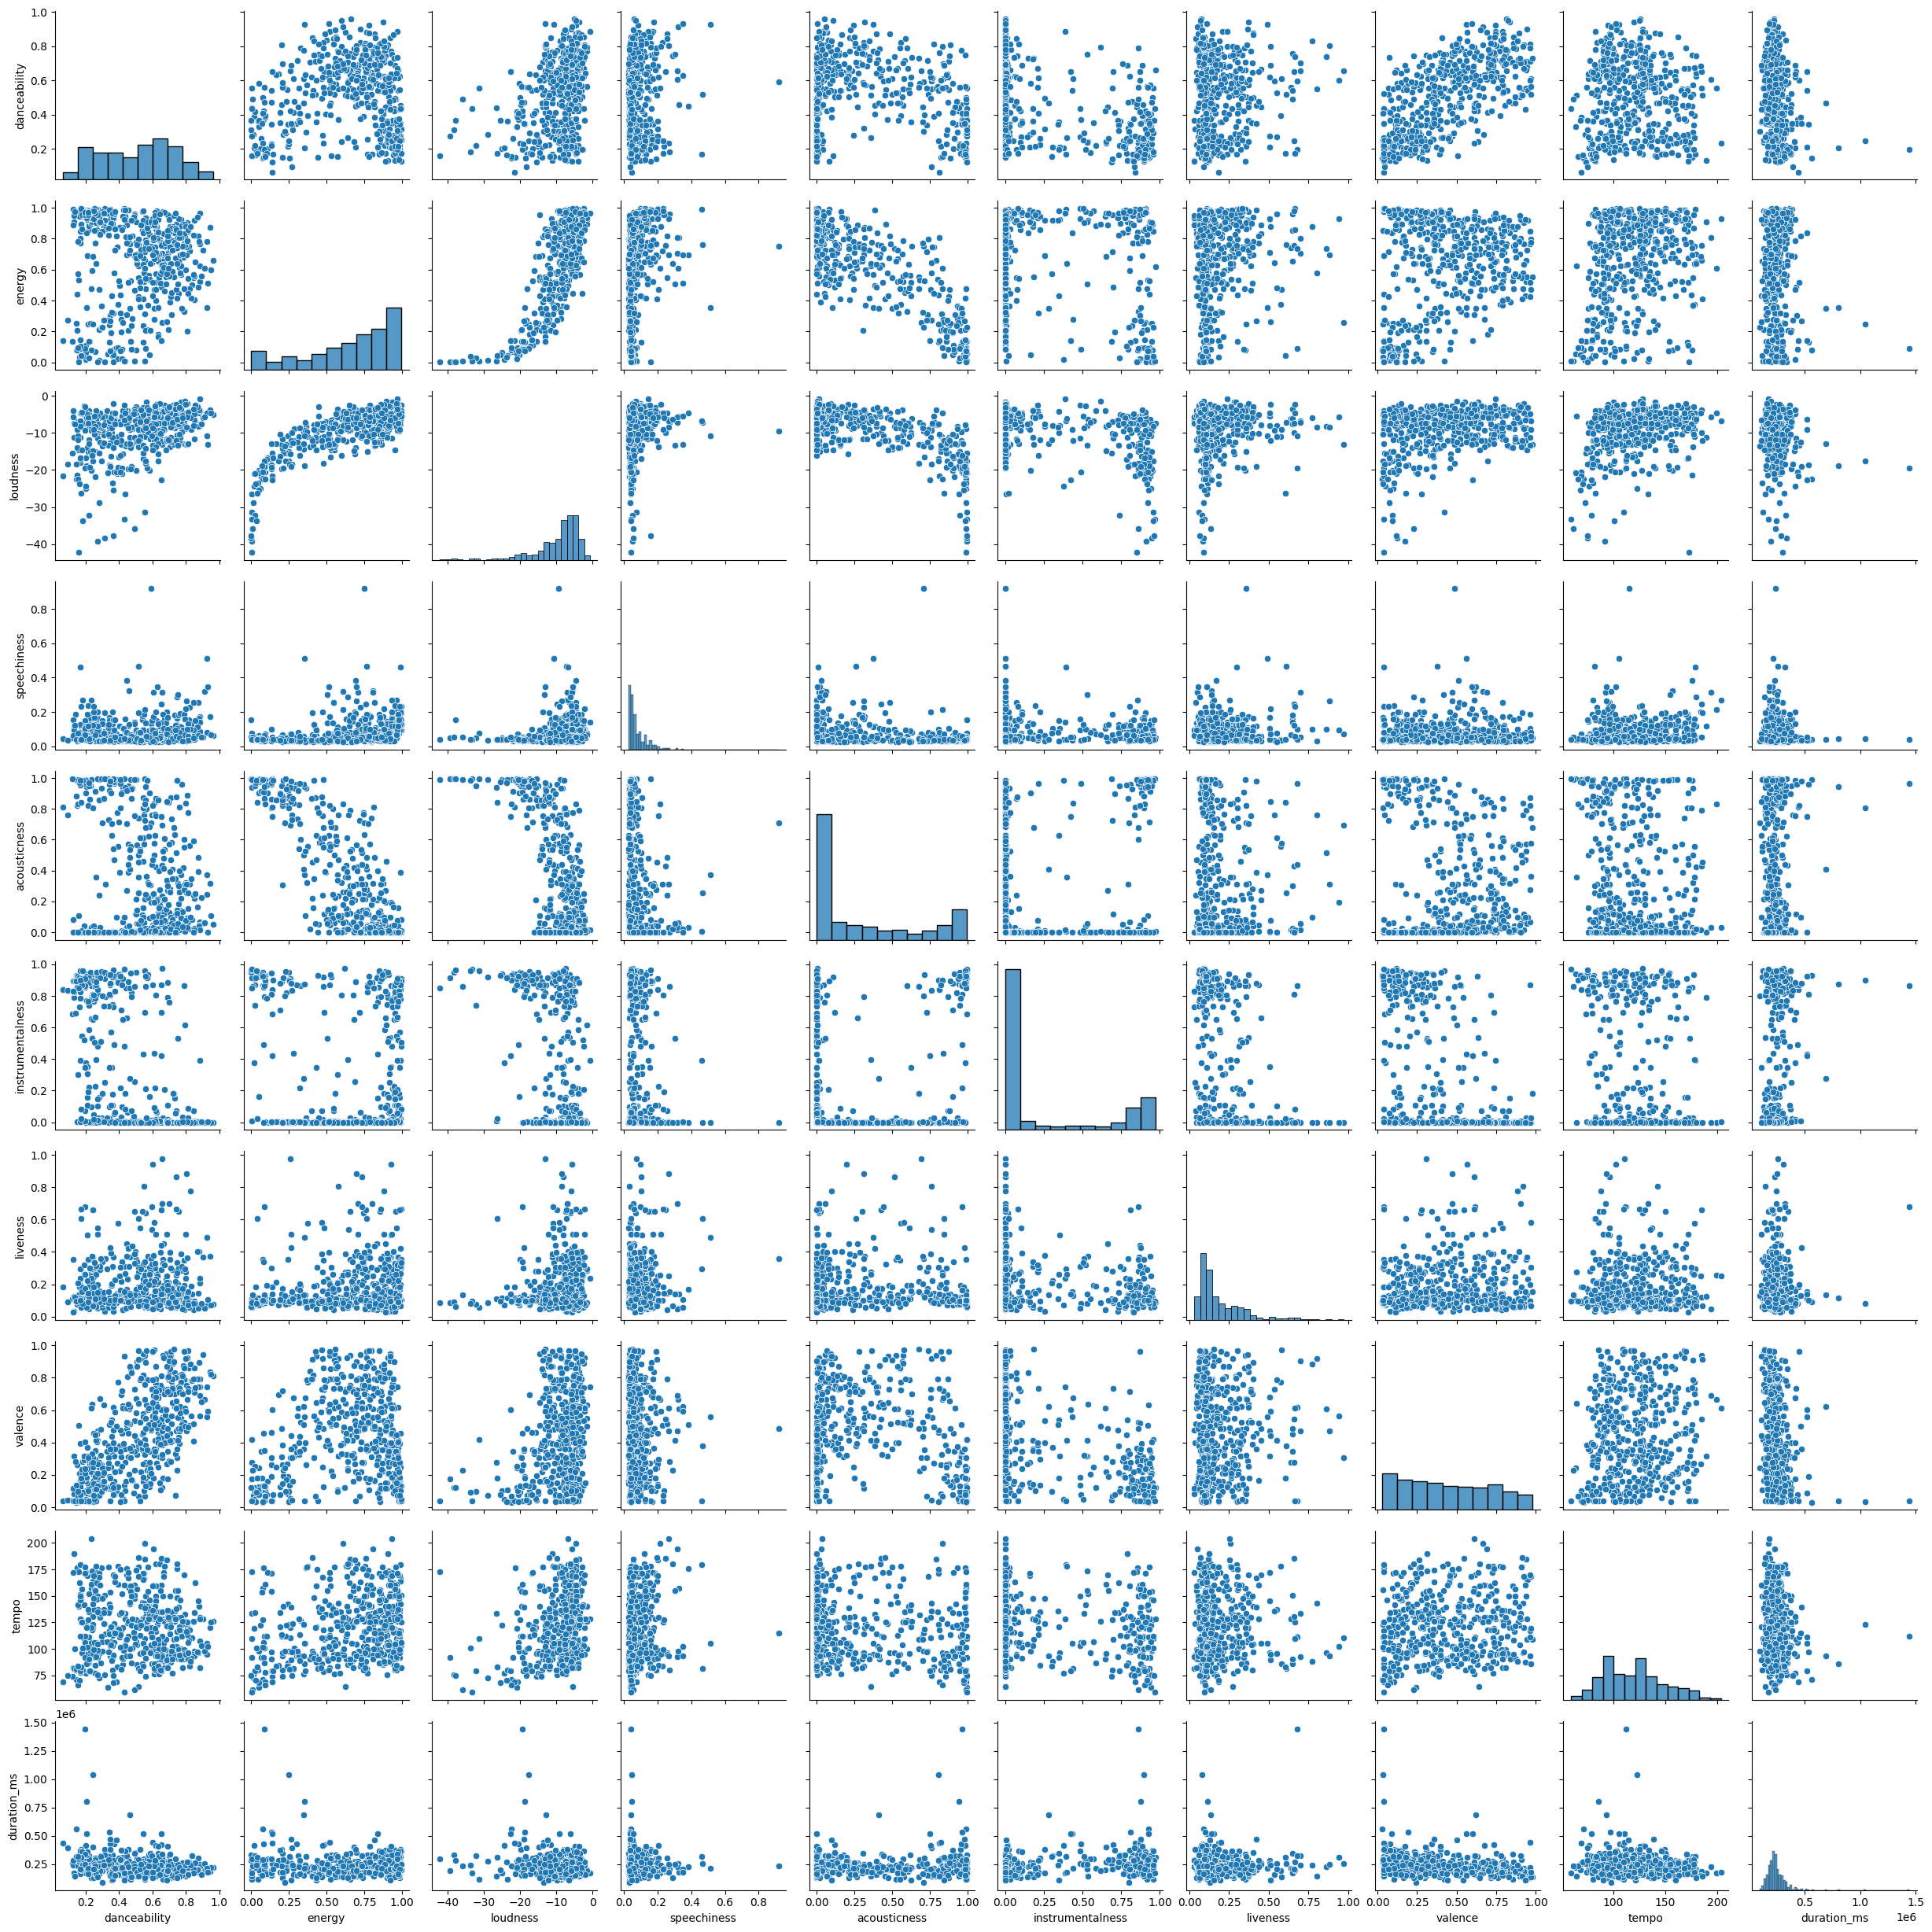

In [43]:
sns.pairplot(data[features].sample(500))
plt.show()


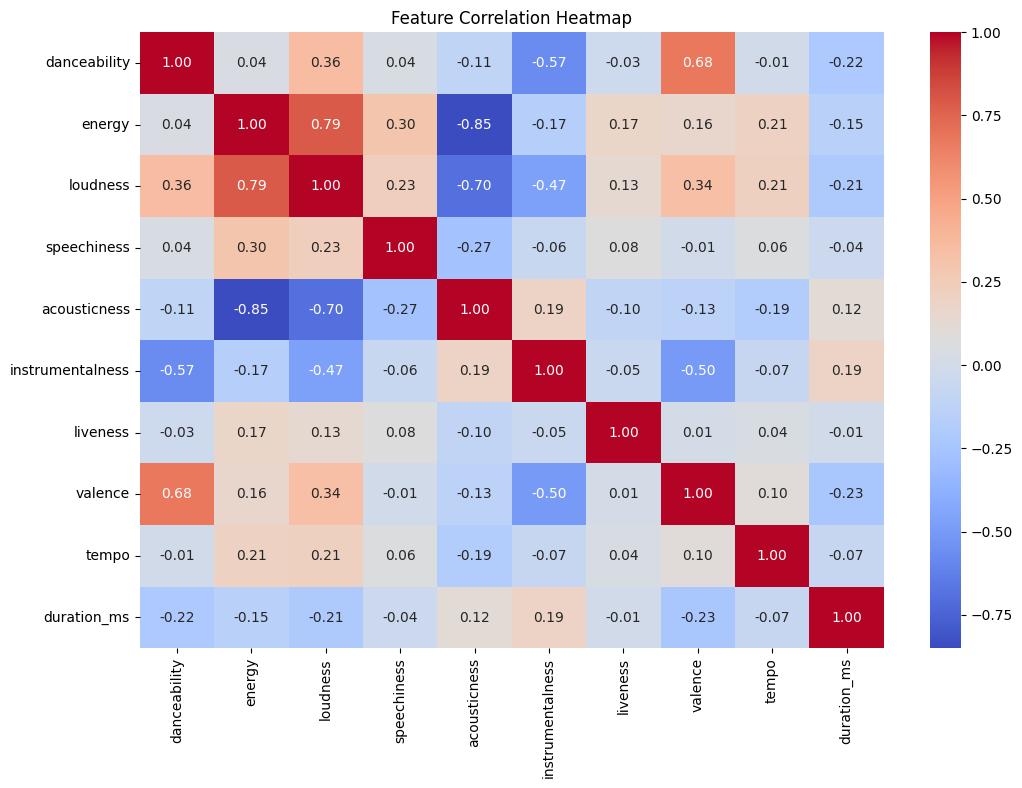

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])


In [46]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by components: {explained_variance}")


Explained variance by components: [0.33001878 0.1891544 ]


In [47]:
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])


In [48]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_data)
reduced_df['KMeans_Cluster'] = clusters_kmeans


In [49]:
silhouette_kmeans = silhouette_score(scaled_data, clusters_kmeans)
print(f"KMeans Silhouette Score: {silhouette_kmeans:.2f}")


KMeans Silhouette Score: 0.21


In [50]:
linkage_matrix = linkage(scaled_data, method='ward')


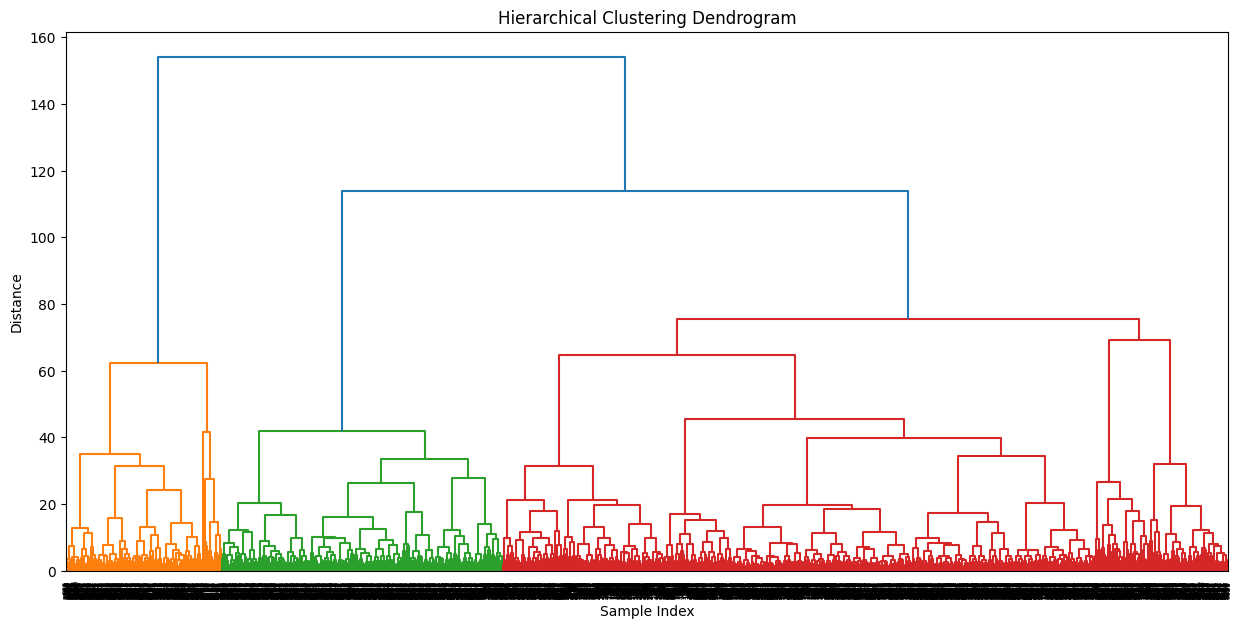

In [51]:
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [52]:
hierarchical_clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')
reduced_df['Hierarchical_Cluster'] = hierarchical_clusters


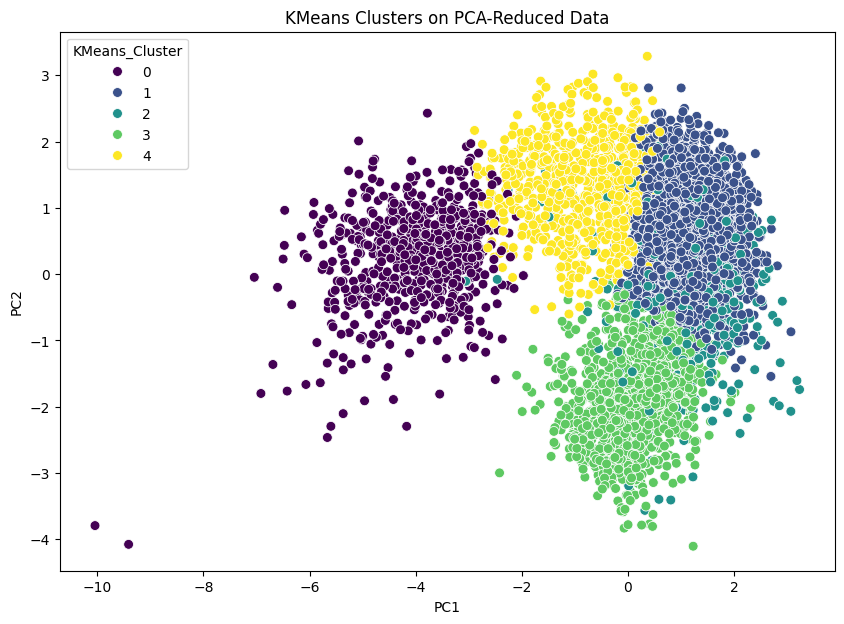

In [53]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', hue='KMeans_Cluster', data=reduced_df, palette='viridis', s=50
)
plt.title('KMeans Clusters on PCA-Reduced Data')
plt.show()


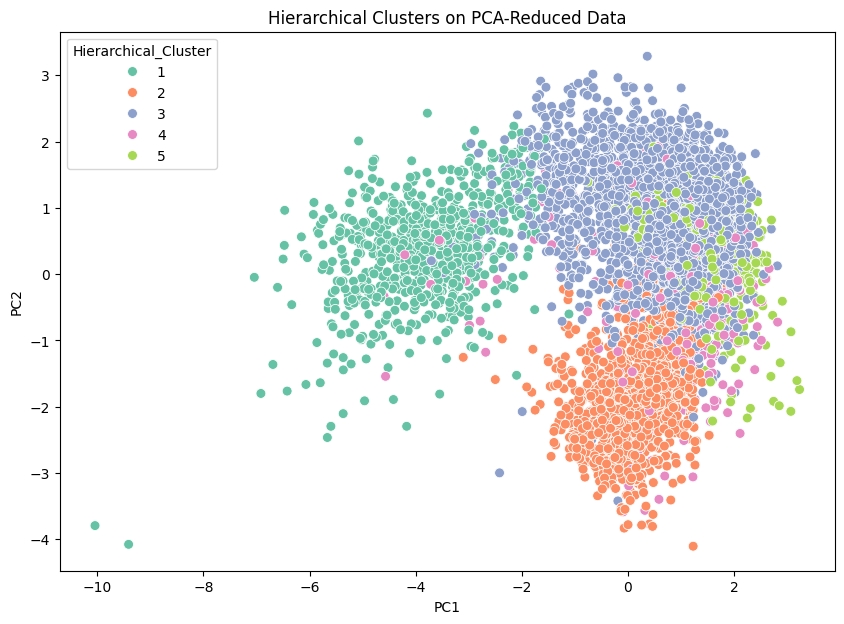

In [54]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', hue='Hierarchical_Cluster', data=reduced_df, palette='Set2', s=50
)
plt.title('Hierarchical Clusters on PCA-Reduced Data')
plt.show()


In [62]:
kmeans_cluster_means = reduced_df.pivot_table(values=['PC1', 'PC2'], index='KMeans_Cluster', aggfunc=np.mean)
print("KMeans Cluster Means:")
print(kmeans_cluster_means)

KMeans Cluster Means:
                     PC1       PC2
KMeans_Cluster                    
0              -3.995405  0.249934
1               1.241920  0.654057
2               1.161202 -0.309264
3               0.079282 -1.921612
4              -0.849551  1.324071


C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_19300\1174282118.py:1: FutureWarning: The provided callable <function mean at 0x000002D4D0BB77E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  kmeans_cluster_means = reduced_df.pivot_table(values=['PC1', 'PC2'], index='KMeans_Cluster', aggfunc=np.mean)


In [63]:
hierarchical_cluster_means = reduced_df.pivot_table(values=['PC1', 'PC2'], index='Hierarchical_Cluster', aggfunc=np.mean)
print("\nHierarchical Cluster Means:")
print(hierarchical_cluster_means)


Hierarchical Cluster Means:
                           PC1       PC2
Hierarchical_Cluster                    
1                    -3.788734  0.387523
2                     0.087696 -1.849106
3                     0.685444  0.786697
4                     0.682302 -0.510584
5                     1.580832  0.289097


C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_19300\3166124271.py:1: FutureWarning: The provided callable <function mean at 0x000002D4D0BB77E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hierarchical_cluster_means = reduced_df.pivot_table(values=['PC1', 'PC2'], index='Hierarchical_Cluster', aggfunc=np.mean)


In [64]:
kmeans_playlist_names = {
    0: 'Low Energy Tracks',
    1: 'High Energy and Positive',
    2: 'High Energy and Mellow',
    3: 'Low Energy and Mellow',
    4: 'Moderate Energy and Positive'
}

hierarchical_playlist_names = {
    1: 'Low Energy Tracks',
    2: 'Moderate Energy and Mellow',
    3: 'High Energy and Positive',
    4: 'High Energy and Mellow',
    5: 'Very High Energy and Positive'
}

In [67]:
output_path = 'clustered_spotify_data.csv'
reduced_df['KMeans_Playlist'] = reduced_df['KMeans_Cluster'].map(kmeans_playlist_names)
reduced_df['Hierarchical_Playlist'] = reduced_df['Hierarchical_Cluster'].map(hierarchical_playlist_names)

output_path_with_playlists = 'clustered_spotify_data_with_playlists.csv'
reduced_df.to_csv(output_path_with_playlists, index=False)


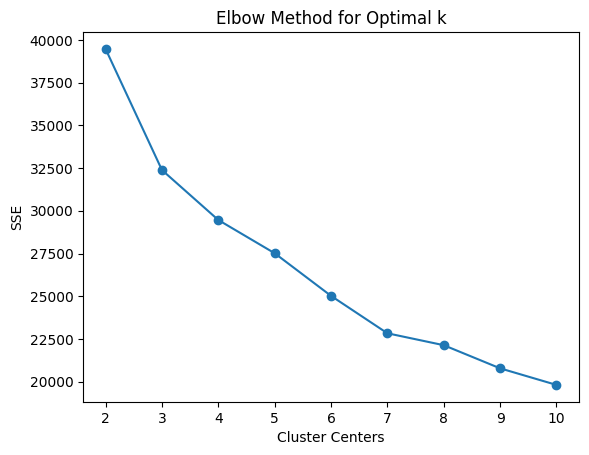

In [68]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('Elbow Method for Optimal k')
    plt.show()
    return sse

sse = find_optimal_clusters(scaled_data, 10)


In [69]:
def test_cluster_differences(data, clusters, features):
    from scipy.stats import f_oneway
    results = {}
    for feature in features:
        groups = [data[data['Cluster'] == cluster][feature] for cluster in np.unique(clusters)]
        f_val, p_val = f_oneway(*groups)
        results[feature] = {'F-value': f_val, 'p-value': p_val}
    return results

data['Cluster'] = clusters_kmeans
kmeans_results = test_cluster_differences(data, clusters_kmeans, features)
print(kmeans_results)

data['Cluster'] = hierarchical_clusters
hierarchical_results = test_cluster_differences(data, hierarchical_clusters, features)
print(hierarchical_results)


{'danceability': {'F-value': np.float64(2242.477979462691), 'p-value': np.float64(0.0)}, 'energy': {'F-value': np.float64(4780.957914821489), 'p-value': np.float64(0.0)}, 'loudness': {'F-value': np.float64(2723.1991679558864), 'p-value': np.float64(0.0)}, 'speechiness': {'F-value': np.float64(177.34675059999176), 'p-value': np.float64(1.1055301203359653e-142)}, 'acousticness': {'F-value': np.float64(5053.732741175999), 'p-value': np.float64(0.0)}, 'instrumentalness': {'F-value': np.float64(1802.8314521832324), 'p-value': np.float64(0.0)}, 'liveness': {'F-value': np.float64(1499.1168239035085), 'p-value': np.float64(0.0)}, 'valence': {'F-value': np.float64(1307.0020952017708), 'p-value': np.float64(0.0)}, 'tempo': {'F-value': np.float64(63.540286931938454), 'p-value': np.float64(1.5695051246757637e-52)}, 'duration_ms': {'F-value': np.float64(109.5202650635651), 'p-value': np.float64(9.00269623215752e-90)}}
{'danceability': {'F-value': np.float64(1592.4697735932002), 'p-value': np.float6